In [21]:
# Load Libraries
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pickle
df  = pd.read_csv('Student_performance_data.csv')
x = df[['Age','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Sports','Music','Volunteering']]
y = df['GPA']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train size : ', x_train.shape, y_train.shape)
print('Test size : ', x_test.shape, y_test.shape)

model = LinearRegression()
model.fit(x_train, y_train)
model.coef_


y_pred = model.predict(x_test)
r2metrics = r2_score(y_test, y_pred)
print("R^2 Linear Regression: ", r2metrics)


with open('WeightBestModel.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as 'WeightBestModel.pkl'")

Train size :  (1913, 8) (1913,)
Test size :  (479, 8) (479,)
R^2 Linear Regression:  0.910395837147819
Model saved as 'WeightBestModel.pkl'


Train shape: (1913, 8), Test shape: (479, 8)
ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

Entrenando LinearRegression...
✅ LinearRegression completado - Test R²: 0.9104

Entrenando Ridge...
✅ Ridge completado - Test R²: 0.9104

Entrenando Lasso...
✅ Lasso completado - Test R²: 0.9104

Entrenando ElasticNet...
✅ ElasticNet completado - Test R²: 0.9104

Entrenando SVR...
✅ SVR completado - Test R²: 0.9103

Entrenando KNN...
✅ KNN completado - Test R²: 0.8421

Entrenando DecisionTree...
✅ DecisionTree completado - Test R²: 0.8523

Entrenando RandomForest...
✅ RandomForest completado - Test R²: 0.8884

Entrenando GradientBoosting...
✅ GradientBoosting completado - Test R²: 0.9037

Entrenando XGBoost...
✅ XGBoost completado - Test R²: 0.9050

Entrenando LightGBM...
✅ LightGBM completado - Test R²: 0.9045

RESULTADOS COMPARATIVOS - R² EN TEST SET

📊 TABLA DE RESULTADOS:
                  Train_R2  Test_R2  Test_RMSE  Test_MAE  CV_Mean_R2  \
LinearRegression    0.9217   0.9104     0.2722    0.2184 

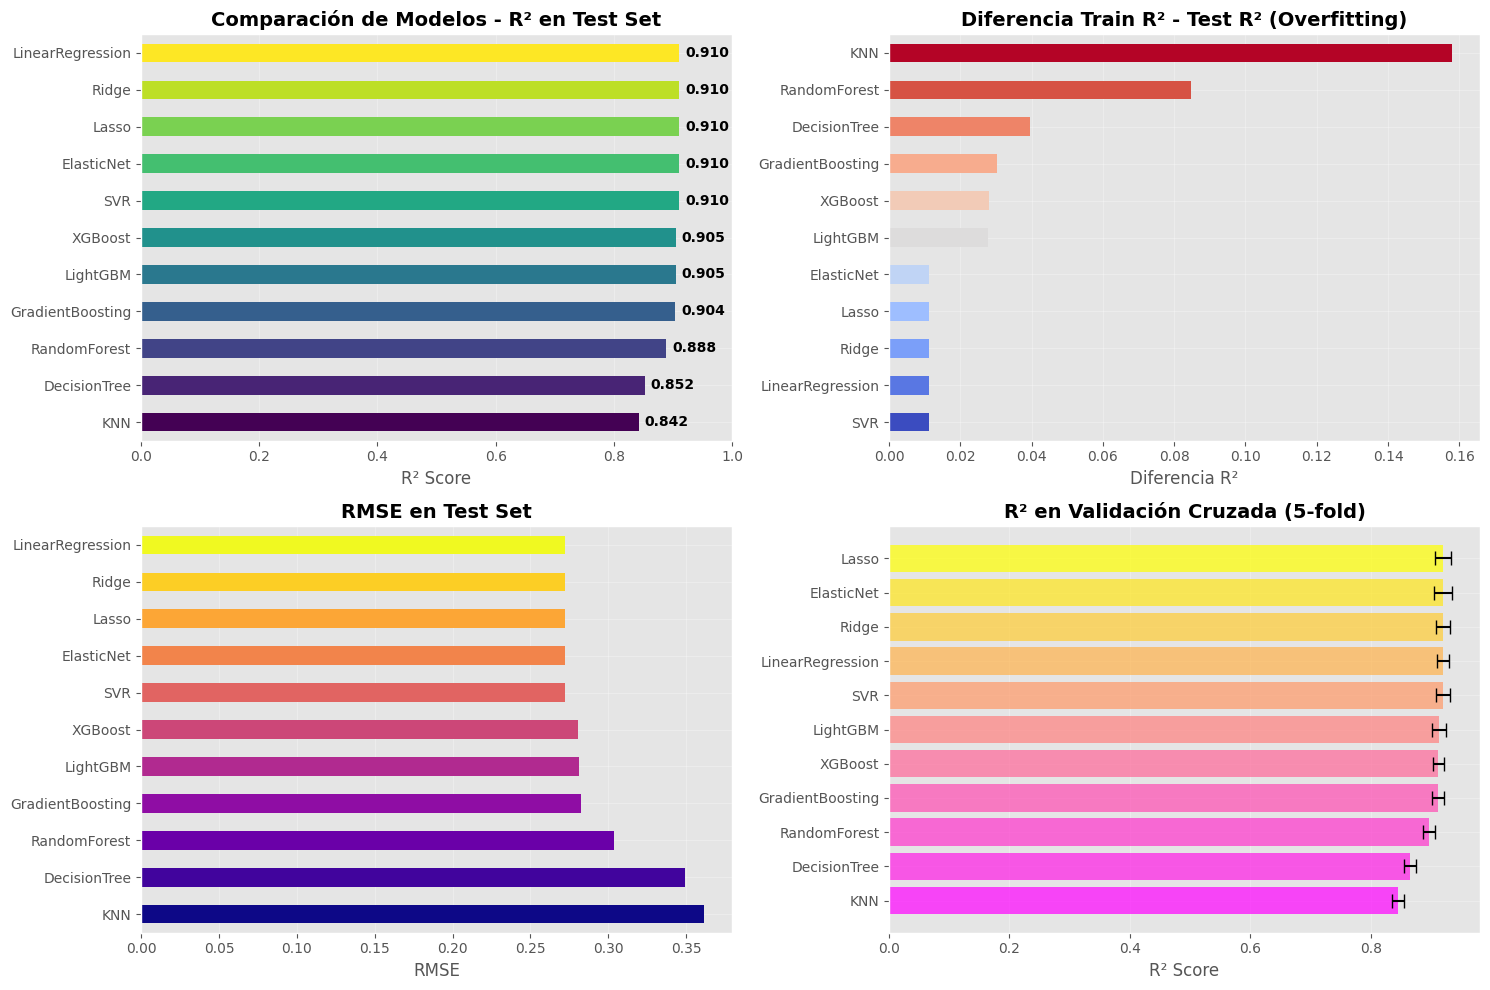


🎯 MEJOR MODELO: LinearRegression con R² = 0.9104


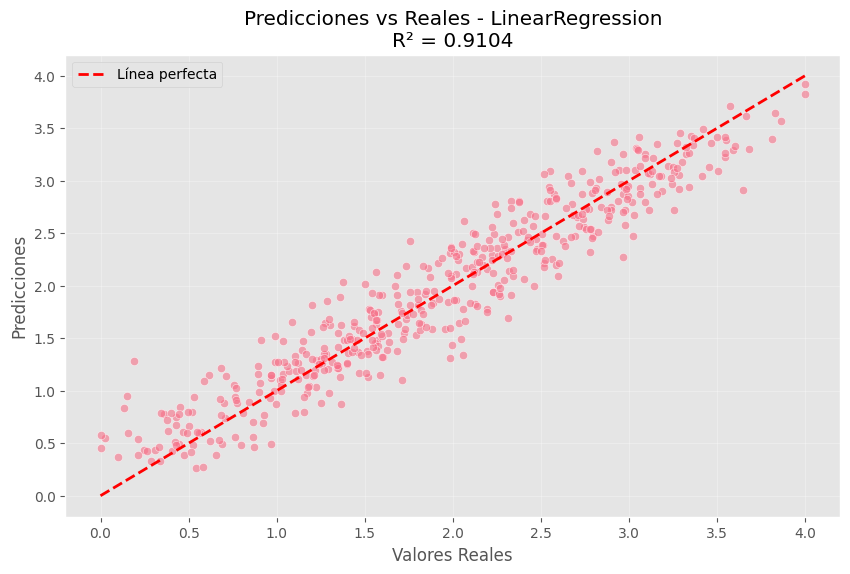


💾 Resultados guardados en 'resultados_modelos.csv'

RESUMEN EJECUTIVO
Mejor modelo: LinearRegression
R² en test: 0.9104
RMSE: 0.2722
MAE: 0.2184
Número de modelos evaluados: 11


In [22]:
# Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# 1. CARGAR Y EXPLORAR LOS DATOS (reemplaza con tus datos)
df  = pd.read_csv('Student_performance_data.csv')
X = df[['Age','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Sports','Music','Volunteering']]
y = df['GPA']

# 2. DIVISIÓN DE DATOS
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# 3. PREPROCESAMIENTO
# Identificar columnas numéricas (si estuvieras usando un DataFrame real)
# numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# 4. DEFINICIÓN DE MODELOS CON PIPELINES
models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(random_state=42))
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(random_state=42))
    ]),
    'ElasticNet': Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNet(random_state=42))
    ]),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ]),
    'DecisionTree': Pipeline([
        ('scaler', StandardScaler()),  # Aunque trees no necesitan escalado, lo mantenemos para consistencia
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))  # No necesita escalado
    ]),
    'GradientBoosting': Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('model', XGBRegressor(random_state=42, verbosity=0))
    ]),
    'LightGBM': Pipeline([
        ('model', LGBMRegressor(random_state=42, verbose=-1))
    ])
}

# 5. PARÁMETROS PARA OPTIMIZACIÓN (GridSearch)
param_grids = {
    'Ridge': {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Lasso': {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'ElasticNet': {'model__alpha': [0.001, 0.01, 0.1, 1, 10],
                  'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'SVR': {'model__C': [0.1, 1, 10],
           'model__gamma': ['scale', 'auto'],
           'model__kernel': ['linear', 'rbf']},
    'KNN': {'model__n_neighbors': [3, 5, 7, 9],
           'model__weights': ['uniform', 'distance']},
    'DecisionTree': {'model__max_depth': [None, 5, 10, 15],
                    'model__min_samples_split': [2, 5, 10]},
    'RandomForest': {'model__n_estimators': [50, 100],
                    'model__max_depth': [None, 10, 15]},
    'GradientBoosting': {'model__n_estimators': [50, 100],
                        'model__learning_rate': [0.01, 0.1],
                        'model__max_depth': [3, 5]},
    'XGBoost': {'model__n_estimators': [50, 100],
               'model__learning_rate': [0.01, 0.1],
               'model__max_depth': [3, 5]},
    'LightGBM': {'model__n_estimators': [50, 100],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 5]}
}

# 6. ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
results = {}
best_models = {}

print("=" * 60)
print("ENTRENAMIENTO Y EVALUACIÓN DE MODELOS")
print("=" * 60)

for name, model in models.items():
    print(f"\nEntrenando {name}...")
    
    try:
        # Optimizar hiperparámetros para modelos que tienen grid definido
        if name in param_grids:
            grid_search = GridSearchCV(
                model, 
                param_grids[name], 
                cv=5, 
                scoring='r2',
                n_jobs=-1,
                verbose=0
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_models[name] = best_model
        else:
            # Para modelos sin grid de parámetros
            model.fit(X_train, y_train)
            best_model = model
            best_models[name] = best_model
        
        # Predicciones
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)
        
        # Métricas
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Validación cruzada
        cv_scores = cross_val_score(best_model, X_train, y_train, 
                                   cv=5, scoring='r2', n_jobs=-1)
        
        results[name] = {
            'Train_R2': train_r2,
            'Test_R2': test_r2,
            'Test_RMSE': test_rmse,
            'Test_MAE': test_mae,
            'CV_Mean_R2': cv_scores.mean(),
            'CV_Std_R2': cv_scores.std(),
            'Overfitting': train_r2 - test_r2  # Diferencia entre train y test
        }
        
        print(f"✅ {name} completado - Test R²: {test_r2:.4f}")
        
    except Exception as e:
        print(f"❌ Error en {name}: {str(e)}")
        results[name] = None

# 7. RESULTADOS COMPARATIVOS
print("\n" + "=" * 80)
print("RESULTADOS COMPARATIVOS - R² EN TEST SET")
print("=" * 80)

# Crear DataFrame con resultados
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values('Test_R2', ascending=False)

# Mostrar tabla de resultados
print("\n📊 TABLA DE RESULTADOS:")
print(results_df.round(4))

# 8. VISUALIZACIÓN DE RESULTADOS
plt.figure(figsize=(15, 10))

# Gráfico de R² en Test Set
plt.subplot(2, 2, 1)
r2_scores = results_df['Test_R2'].sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(r2_scores)))
r2_scores.plot(kind='barh', color=colors)
plt.title('Comparación de Modelos - R² en Test Set', fontsize=14, fontweight='bold')
plt.xlabel('R² Score')
plt.xlim(0, 1)
plt.grid(True, alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(r2_scores):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Gráfico de Overfitting (Train R² - Test R²)
plt.subplot(2, 2, 2)
overfitting = results_df['Overfitting'].sort_values(ascending=True)
overfitting.plot(kind='barh', color=plt.cm.coolwarm(np.linspace(0, 1, len(overfitting))))
plt.title('Diferencia Train R² - Test R² (Overfitting)', fontsize=14, fontweight='bold')
plt.xlabel('Diferencia R²')
plt.grid(True, alpha=0.3)

# Gráfico de RMSE
plt.subplot(2, 2, 3)
rmse_scores = results_df['Test_RMSE'].sort_values(ascending=False)
rmse_scores.plot(kind='barh', color=plt.cm.plasma(np.linspace(0, 1, len(rmse_scores))))
plt.title('RMSE en Test Set', fontsize=14, fontweight='bold')
plt.xlabel('RMSE')
plt.grid(True, alpha=0.3)

# Gráfico de Validación Cruzada
plt.subplot(2, 2, 4)
cv_means = results_df['CV_Mean_R2'].sort_values(ascending=True)
cv_stds = results_df['CV_Std_R2']
plt.barh(range(len(cv_means)), cv_means, xerr=cv_stds, 
         alpha=0.7, capsize=5, color=plt.cm.spring(np.linspace(0, 1, len(cv_means))))
plt.title('R² en Validación Cruzada (5-fold)', fontsize=14, fontweight='bold')
plt.xlabel('R² Score')
plt.yticks(range(len(cv_means)), cv_means.index)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. MEJOR MODELO
best_model_name = results_df.index[0]
best_model_score = results_df.iloc[0]['Test_R2']
print(f"\n🎯 MEJOR MODELO: {best_model_name} con R² = {best_model_score:.4f}")

# 10. PREDICCIONES DEL MEJOR MODELO (ejemplo)
best_model = best_models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Línea perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Predicciones vs Reales - {best_model_name}\nR² = {best_model_score:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 11. IMPORTANCIA DE VARIABLES (para modelos tree-based)
if hasattr(best_model, 'feature_importances_'):
    if hasattr(best_model, 'named_steps'):  # Si es un pipeline
        feature_importances = best_model.named_steps['model'].feature_importances_
    else:
        feature_importances = best_model.feature_importances_
    
    # Crear DataFrame con importancias
    if hasattr(X, 'columns'):  # Si X es un DataFrame
        feature_names = X.columns
    else:
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['feature'][:15], importance_df['importance'][:15])
    plt.xlabel('Importancia')
    plt.title(f'Top 15 Variables más Importantes - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.show()

# 12. GUARDAR RESULTADOS
results_df.to_csv('resultados_modelos.csv', encoding='utf-8')
print(f"\n💾 Resultados guardados en 'resultados_modelos.csv'")

# Mostrar resumen final
print("\n" + "=" * 80)
print("RESUMEN EJECUTIVO")
print("=" * 80)
print(f"Mejor modelo: {best_model_name}")
print(f"R² en test: {best_model_score:.4f}")
print(f"RMSE: {results_df.iloc[0]['Test_RMSE']:.4f}")
print(f"MAE: {results_df.iloc[0]['Test_MAE']:.4f}")
print(f"Número de modelos evaluados: {len(results_df)}")